Business Review Classifier
==============

Goal: Using yelp dataset create a model that can classify the sentiment of the user.

Feature: text
Label: stars


Interpretation of stars
 5,4,3 -> Happy
 2,1 -> Sad

#### Student: Eric Michel
September 9, 2024

In [39]:
# !pip install -q streamlit

# !npm install localtunnel

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import re

# Download stopwords for NLTK
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oysterable/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
df = pd.read_csv('./Datasets/yelp.csv')
# df = pd.read_csv('./Datasets/yelp.csv',sep=',',names=['Sentiment','Review'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [42]:
sub_df = df[['stars','text']]
sub_df

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...
...,...,...
9995,3,First visit...Had lunch here today - used my G...
9996,4,Should be called house of deliciousness!\n\nI ...
9997,4,I recently visited Olive and Ivy for business ...
9998,2,My nephew just moved to Scottsdale recently so...


In [43]:
df.stars.value_counts()

stars
4    3526
5    3337
3    1461
2     927
1     749
Name: count, dtype: int64

In [44]:
# Interpretation of stars
#  5,4,3 -> Happy
#  2,1 -> Sad

labels = df['stars'].apply(lambda x: 'happy' if int(x)>2 else 'sad').reset_index(drop=True)
labels

0       happy
1       happy
2       happy
3       happy
4       happy
        ...  
9995    happy
9996    happy
9997    happy
9998      sad
9999    happy
Name: stars, Length: 10000, dtype: object

Check Bias

In [45]:
labels.value_counts()

stars
happy    8324
sad      1676
Name: count, dtype: int64

In [46]:
features = df['text']
features

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
2       love the gyro plate. Rice is so good and I als...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
                              ...                        
9995    First visit...Had lunch here today - used my G...
9996    Should be called house of deliciousness!\n\nI ...
9997    I recently visited Olive and Ivy for business ...
9998    My nephew just moved to Scottsdale recently so...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 10000, dtype: object

In [47]:
# #Preprocess the text data
# def preprocess_text(text):
#     text = text.lower()  # Convert to lowercase
#     text = re.sub(r'\W', ' ', text)  # Remove punctuation and special characters
#     text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
#     text = re.sub(r'\d', '', text)  # Remove numbers
#     stop_words = set(stopwords.words('english'))
#     words = text.split()
#     tokens = ' '.join([word for word in words if word not in stop_words])
#     return tokens


def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    
    # Tokenize
    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word not in stop_words]

    # Stemming (optional)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)

In [48]:
# Apply preprocessing to features
features = features.apply(preprocess_text)

labels = labels.map({'happy': 1, 'sad': 0})

labels

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    0
9999    1
Name: stars, Length: 10000, dtype: int64

In [49]:
features

0       wife took birthday breakfast excellent weather...
1       idea people give bad reviews place goes show p...
2       love gyro plate rice good also dig candy selec...
3       rosie dakota love chaparral dog park convenien...
4       general manager scott petello good egg go deta...
                              ...                        
9995    first visit lunch today used groupon ordered b...
9996    called house deliciousness could go item item ...
9997    recently visited olive ivy business last week ...
9998    nephew moved scottsdale recently bunch friends...
9999    locations star average think arizona really fa...
Name: text, Length: 10000, dtype: object

In [70]:
#Vectorize the text using TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer(max_features=3000)
vectorizer

TfidfVectorizer(max_features=3000)

In [71]:
# Vectorize the features

features_tfidf = vectorizer.fit_transform(features)


In [72]:
#Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_tfidf, labels, test_size=0.2, random_state=42)

# X_test_tfidf = vectorizer.transform(X_test)

In [73]:
#Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [54]:
#Check Quality of the Model

# print(f"Testing score is {model.score(X_test_tfidf,y_test)} and TrainingScore is {model.score(X_train,y_train)} ")
print(f"Testing score is {model.score(X_test,y_test)} and TrainingScore is {model.score(X_train,y_train)} ")

Testing score is 0.8875 and TrainingScore is 0.911375 


In [75]:
#Classification report
from sklearn.metrics import classification_report, confusion_matrix


# print(classification_report(y_test,model.predict(X_test_tfidf)))
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.32      0.47       308
           1       0.89      0.99      0.94      1692

    accuracy                           0.89      2000
   macro avg       0.87      0.66      0.70      2000
weighted avg       0.88      0.89      0.86      2000



# Confusion matrix

              precision    recall  f1-score   support

           0       0.86      0.32      0.47       308
           1       0.89      0.99      0.94      1692

    accuracy                           0.89      2000
   macro avg       0.87      0.66      0.70      2000
weighted avg       0.88      0.89      0.86      2000



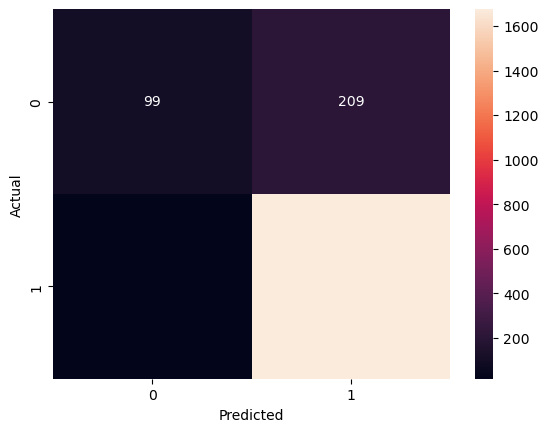

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Using GridSearchCV (Cross-Validation) with a SVM classifier

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score

# Define the corrected parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'class_weight': [None, 'balanced']
}

# Create an SVM classifier
svm = SVC(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring=make_scorer(f1_score, average='weighted'),
    n_jobs=-1,
    verbose=2
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_svm = grid_search.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ...C=0.1, class_weight=None, gamma=auto, kernel=rbf; total time=  14.1s
[CV] END ...C=0.1, class_weight=None, gamma=auto, kernel=rbf; total time=  14.2s
[CV] END ...C=0.1, class_weight=None, gamma=auto, kernel=rbf; total time=  14.3s
[CV] END ...C=0.1, class_weight=None, gamma=auto, kernel=rbf; total time=  14.4s
[CV] END ...C=0.1, class_weight=None, gamma=auto, kernel=rbf; total time=  14.6s
[CV] END C=0.1, class_weight=None, gamma=auto, kernel=linear; total time=  17.5s
[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=  17.5s
[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=  17.5s
[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=  17.6s
[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=  17.7s
[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=  17.8s
[CV] END ..C=0.1, class_weight=None, gamma

KeyboardInterrupt: 

In [69]:

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)



Best parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.8905452373712215


In [76]:
# Train the model on best estimator
best_svm_final = SVC(**grid_search.best_params_, random_state=42)
best_svm_final.fit(X_train, y_train)  # Fit the model on the original data (X, y)

SVC(C=1, class_weight='balanced', gamma=1, random_state=42)

              precision    recall  f1-score   support

           0       0.72      0.59      0.65       308
           1       0.93      0.96      0.94      1692

    accuracy                           0.90      2000
   macro avg       0.82      0.78      0.80      2000
weighted avg       0.90      0.90      0.90      2000



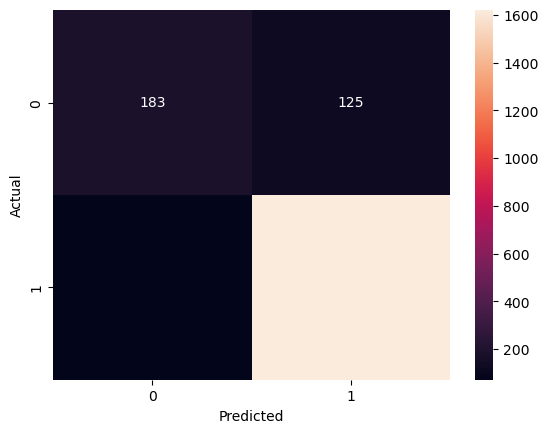

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = best_svm_final.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Test the model

Ex) Happy - The food and service was great

Ex) Sad - They kept me waiting long time and service was poor
charged too much

In [68]:
# Function to preprocess and predict sentiment for new text
def predict_sentiment(text, vectorizer, model):
    # Preprocess the text (assuming you have a preprocess_text function)
    processed_text = preprocess_text(text)

    # Transform the text using the same vectorizer
    text_vector = vectorizer.transform([processed_text])

    # Make prediction
    prediction = model.predict(text_vector)[0] # Use the original text_vector for prediction

    return "This is a HAPPY customer." if prediction == 1 else "This is a SAD customer."



# Test usage
# new_text = "The food was amazing and the service was excellent!"
new_text = input("Enter a bussiness Review to classify: ")

# sentiment = predict_sentiment(new_text, vectorizer, model)
sentiment = predict_sentiment(new_text, vectorizer, best_svm_final)


print(f"Predicted sentiment: {sentiment}")

Predicted sentiment: This is a HAPPY customer.


## Deploy Model

In [19]:
import joblib
joblib.dump(model, 'review_classifier_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Save the models
joblib.dump(best_svm_final, 'svm_classifier_model.joblib')


['tfidf_vectorizer.pkl']

Create Streamlit App

In [20]:
%%writefile app.py

import streamlit as st
import joblib
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if needed
nltk.download('stopwords')

## Load the model and vectorizer
model = joblib.load('review_classifier_model.pkl')
# model = joblib.load('svm_classifier_model.joblib')

vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Preprocess the text similar to how the model was trained
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)  # Remove punctuation and special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\d', '', text)  # Remove numbers
    stop_words = set(stopwords.words('english'))
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words])
    return text

# Streamlit App UI
st.title("Customer Review Classifier")

# Text input
user_input = st.text_input("Enter a business review:")

if st.button("Classify"):
    if user_input:
        # Preprocess user input
        processed_input = preprocess_text(user_input)

        # Vectorize the input text
        input_tfidf = vectorizer.transform([processed_input])

        # Get the prediction
        prediction = model.predict(input_tfidf)

        # Output result
        if prediction[0] == 1:
            st.write("This is a **HAPPY** review.")
        else:
            st.write("This is a **SAD** review.")
    else:
        st.write("Please enter a review to classify.")


Overwriting app.py


Run a local server and deploy to a public VPN using LocalTunnel

In [21]:
import urllib

print("Password/Enpoint IP for localtunnel is:", urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 172.56.234.148


Run the app and expose to localtunnel server

In [22]:
!streamlit run app.py &>./content/logs.txt & npx localtunnel --port 8501

your url is: https://proud-plants-speak.loca.lt
^C


In [23]:
## Run this command in the terminal...
# streamlit run app.py &>./content/logs.txt & npx localtunnel --port 8501

# you will get a url like this:
# https://icy-cloths-appear.loca.lt

### Conclusions

Predictions are not very accurate and this model is very sensitive to specific trigger words.

For example, this reviews will fail:

i don't recommend it

bad service, i don't recommend it

They kept me waiting long time

charged too much and did not liked the service




Things to try for improvement:

1. Try other algorithms like Random Forest changing the layers, Decision Tree, SVM, XGBoost etc.

2. Either using LSTM or Transformer (Encoder) Architecture (BERT).

3. Add more data points in the dataset